토큰화 작업 수행하기

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

texts = ['You are the Best', 
         'You are the Nice']

tokenizer = Tokenizer(num_words = 10, oov_token = '<OOV>')#OOV : out of vocabulary -> 사전에 없는 단어일 경우 1로 인코딩
tokenizer.fit_on_texts(texts)

# 텍스트 데이터를 정수 인덱스 형태로 변환합니다.
sequences = tokenizer.texts_to_sequences(texts)

# 이진 형태로 인코딩합니다.
binary_results = tokenizer.sequences_to_matrix(sequences, mode = 'binary')

print(tokenizer.word_index)
print('--------------------')

print(f'sequences: {sequences}\n')
print(f'binary_vectors:\n {binary_results}\n')

# 원-핫 형태로 인코딩합니다.

print(to_categorical(sequences))

test_text = ['You are the One']
test_seq = tokenizer.texts_to_sequences(test_text)

print(f'test sequences: {test_seq}')

{'<OOV>': 1, 'you': 2, 'are': 3, 'the': 4, 'best': 5, 'nice': 6}
--------------------
sequences: [[2, 3, 4, 5], [2, 3, 4, 6]]

binary_vectors:
 [[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 0. 0. 0.]]

[[[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]]

 [[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]
test sequences: [[2, 3, 4, 1]]


데이터셋 다운받기

In [ ]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)#5:5로 가져오기

데이터 형태 확인하기

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


첫 번째 데이터 확인하기

In [ ]:
print(x_train[0]) # 리뷰 글 데이터 -> 빈번하게 사용되는 단어 순위
print('-------')
print(y_train[0]) # 라벨 -> 1 :긍정, 0 :부정

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
-------
1


IMDB 데이터셋에서 가장 빈번하게 사용되는 3개의 단어

In [ ]:
imdb_get_word_index = {}

for key, value in imdb.get_word_index().items():
    imdb_get_word_index[value] = key
    
for i in range(20, 40):
    print('{}번째로 가장 많이 쓰인 단어 = {}'.format(i, imdb_get_word_index[i]))

20번째로 가장 많이 쓰인 단어 = on
21번째로 가장 많이 쓰인 단어 = not
22번째로 가장 많이 쓰인 단어 = you
23번째로 가장 많이 쓰인 단어 = are
24번째로 가장 많이 쓰인 단어 = his
25번째로 가장 많이 쓰인 단어 = have
26번째로 가장 많이 쓰인 단어 = he
27번째로 가장 많이 쓰인 단어 = be
28번째로 가장 많이 쓰인 단어 = one
29번째로 가장 많이 쓰인 단어 = all
30번째로 가장 많이 쓰인 단어 = at
31번째로 가장 많이 쓰인 단어 = by
32번째로 가장 많이 쓰인 단어 = an
33번째로 가장 많이 쓰인 단어 = they
34번째로 가장 많이 쓰인 단어 = who
35번째로 가장 많이 쓰인 단어 = so
36번째로 가장 많이 쓰인 단어 = from
37번째로 가장 많이 쓰인 단어 = like
38번째로 가장 많이 쓰인 단어 = her
39번째로 가장 많이 쓰인 단어 = or


데이터를 동일한 길이로 맞추기
- 기준하는 것에 맞춰서 모자라면 맞춰주고 넘치면 자른다.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

print('Before pad_sequences: ', len(x_train[0]))

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding = 'pre')
pad_x_test = pad_sequences(x_test, maxlen=max_len, padding = 'pre')

print('After pad_sequences: ', len(pad_x_train[0]))

Before pad_sequences:  218
After pad_sequences:  500


Embedding 층을 사용하여 모델 구성하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
# 이 층은 모델의 제일 첫 번째 층으로만 사용할 수 있습니다.
# Flatten 층을 사용하기 위해 input_length를 전달합니다.
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))#Embedding은 무조건 input을 넣을 수 있는 첫번째 증에서만 입력할 수 있다.
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
# 타겟변수를 찾는 형태

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
flatten (Flatten)            (None, 16000)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 16001     
Total params: 336,001
Trainable params: 336,001
Non-trainable params: 0
_________________________________________________________________


모델 학습시키기

In [ ]:
history = model.fit(pad_x_train, y_train, 
                    batch_size = 32, 
                    epochs = 30, 
                    validation_split = 0.2) # validation_split : 자동으로 지정한 수치만큼 val를 만들어준다. 랜덤이 아니라 뒤에서 몇퍼센트 이렇게 잘라서 사용한다.


Epoch 1/30
625/625 [==============================] - 7s 11ms/step - loss: 0.4639 - acc: 0.7707 - val_loss: 0.2969 - val_acc: 0.8796
Epoch 2/30
625/625 [==============================] - 7s 11ms/step - loss: 0.2011 - acc: 0.9250 - val_loss: 0.2782 - val_acc: 0.8824
Epoch 3/30
625/625 [==============================] - 7s 11ms/step - loss: 0.1071 - acc: 0.9692 - val_loss: 0.2910 - val_acc: 0.8846
Epoch 4/30
625/625 [==============================] - 7s 11ms/step - loss: 0.0500 - acc: 0.9913 - val_loss: 0.3086 - val_acc: 0.8846
Epoch 5/30
625/625 [==============================] - 6s 10ms/step - loss: 0.0233 - acc: 0.9977 - val_loss: 0.3315 - val_acc: 0.8840
Epoch 6/30
625/625 [==============================] - 6s 10ms/step - loss: 0.0113 - acc: 0.9997 - val_loss: 0.3604 - val_acc: 0.8826
Epoch 7/30
625/625 [==============================] - 7s 11ms/step - loss: 0.0063 - acc: 0.9998 - val_loss: 0.3835 - val_acc: 0.8814
Epoch 8/30
625/625 [==============================] - 7s 11ms/step - 

학습과정 확인하기

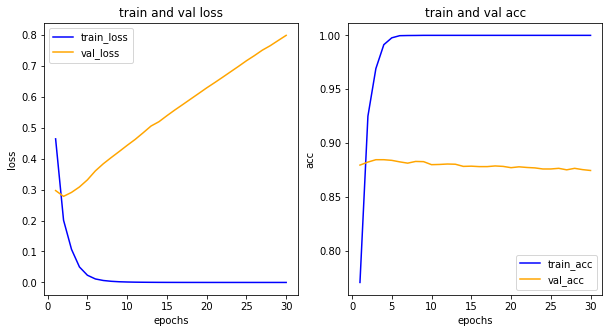

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

모델 평가하기

In [ ]:
model.evaluate(pad_x_test, y_test) # 정확도는 괜찮은데 5번정도만 학습시켜도 된다. 그 이상 시키면 외워버려서 과적합.

782/782 [==============================] - 2s 2ms/step - loss: 0.8124 - acc: 0.8722


[0.8124492168426514, 0.8722400069236755]